In [1]:
#Loading Libraries
import pandas as pd
import numpy as np
print("Done")

Done


In [2]:
#Loading Dataset
df=pd.read_csv('./leuanalysisNew.csv')

df.head()

,CELL,SMEAR,INFIL,LI,BLAST,TEMP,REMISS
0,0.8,0.83,0.66,1.9,1.10,1.00,1
1,0.9,0.36,0.32,1.4,0.74,0.99,1
2,0.8,0.88,0.70,0.8,0.18,0.98,0
3,1.0,0.87,0.87,0.7,1.05,0.99,0
4,0.9,0.75,0.68,1.3,0.52,0.98,1


In [14]:
#Create x and y variables
x = df.drop('REMISS',axis=1).to_numpy()
y = df['REMISS'].to_numpy()

#Create Train and Test datasets
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y,test_size = 0.20,random_state=100)

#Scale the data
from sklearn.preprocessing import StandardScaler  
sc = StandardScaler()  
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)

In [17]:
#Script for SVM and NB
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix  

for name,method in [('SVM', SVC(kernel='poly',random_state=100)),
                    ('Naive Bayes',GaussianNB())]: 
    method.fit(x_train2,y_train)
    predict = method.predict(x_test2)
    target_names=['0','1']
    print('\nEstimator: {}'.format(name)) 
    print(confusion_matrix(y_test,predict))  
    print(classification_report(y_test,predict,target_names=target_names))


Estimator: SVM
[[3 1]
 [1 1]]
              precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.50      0.50      0.50         2

    accuracy                           0.67         6
   macro avg       0.62      0.62      0.62         6
weighted avg       0.67      0.67      0.67         6


Estimator: Naive Bayes
[[4 0]
 [2 0]]
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         4
           1       0.00      0.00      0.00         2

    accuracy                           0.67         6
   macro avg       0.33      0.50      0.40         6
weighted avg       0.44      0.67      0.53         6



C:\Users\ramse\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ramse\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ramse\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


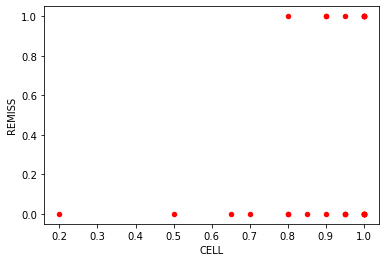

In [18]:
df.plot(kind='scatter',x='CELL',y='REMISS',color='red')
plt.show()

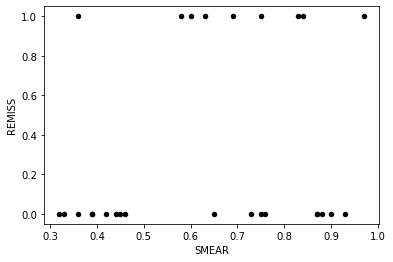

In [19]:
df.plot(kind='scatter',x='SMEAR',y='REMISS',color='black')
plt.show()

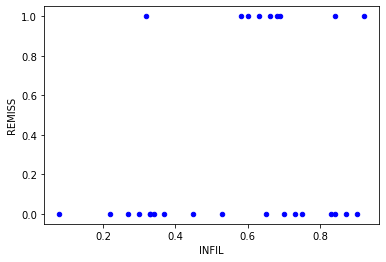

In [21]:
df.plot(kind='scatter',x='INFIL',y='REMISS',color='blue')
plt.show()

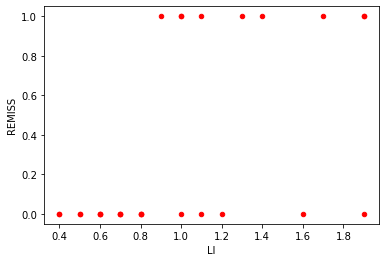

In [22]:
df.plot(kind='scatter',x='LI',y='REMISS',color='red')
plt.show()

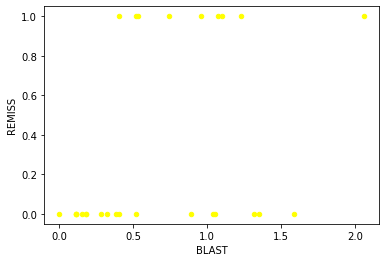

In [23]:
df.plot(kind='scatter',x='BLAST',y='REMISS',color='yellow')
plt.show()

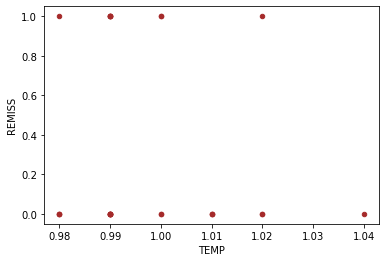

In [24]:
df.plot(kind='scatter',x='TEMP',y='REMISS',color='brown')
plt.show()